In [2]:
import pandas as pd

# Cargando los archivos proporcionados
file_clustered_data = 'ensadul2021SelcolClustered.csv'
file_centroids = 'TablaCentroides.csv'

# Leyendo los datos
clustered_data = pd.read_csv(file_clustered_data, delimiter=';')
centroid_data = pd.read_csv(file_centroids, delimiter=';')

# Mostrando las primeras filas de cada archivo para obtener una vista previa
preview_clustered_data = clustered_data.head()
preview_centroids = centroid_data.head()

preview_clustered_data, preview_centroids


(           Folio Folio de integrante Region o zona de trabajo  \
 0  2021_01001019    2021_01001019_02             Centro_Norte   
 1  2021_01001019    2021_01001019_03             Centro_Norte   
 2  2021_01001021    2021_01001021_02             Centro_Norte   
 3  2021_01001031    2021_01001031_04             Centro_Norte   
 4  2021_01001105    2021_01001105_03             Centro_Norte   
 
             DESC_ENT  Edad del Seleccionado  \
 0  01 AGUASCALIENTES                     42   
 1  01 AGUASCALIENTES                     21   
 2  01 AGUASCALIENTES                     48   
 3  01 AGUASCALIENTES                     24   
 4  01 AGUASCALIENTES                     42   
 
   ASEXO ¿Cuál es el sexo de (NOMBRE) ?  \
 0                                Mujer   
 1                               Hombre   
 2                               Hombre   
 3                                Mujer   
 4                                Mujer   
 
   ¿Qué edad tenía cuando le diagnosticaron obesidad

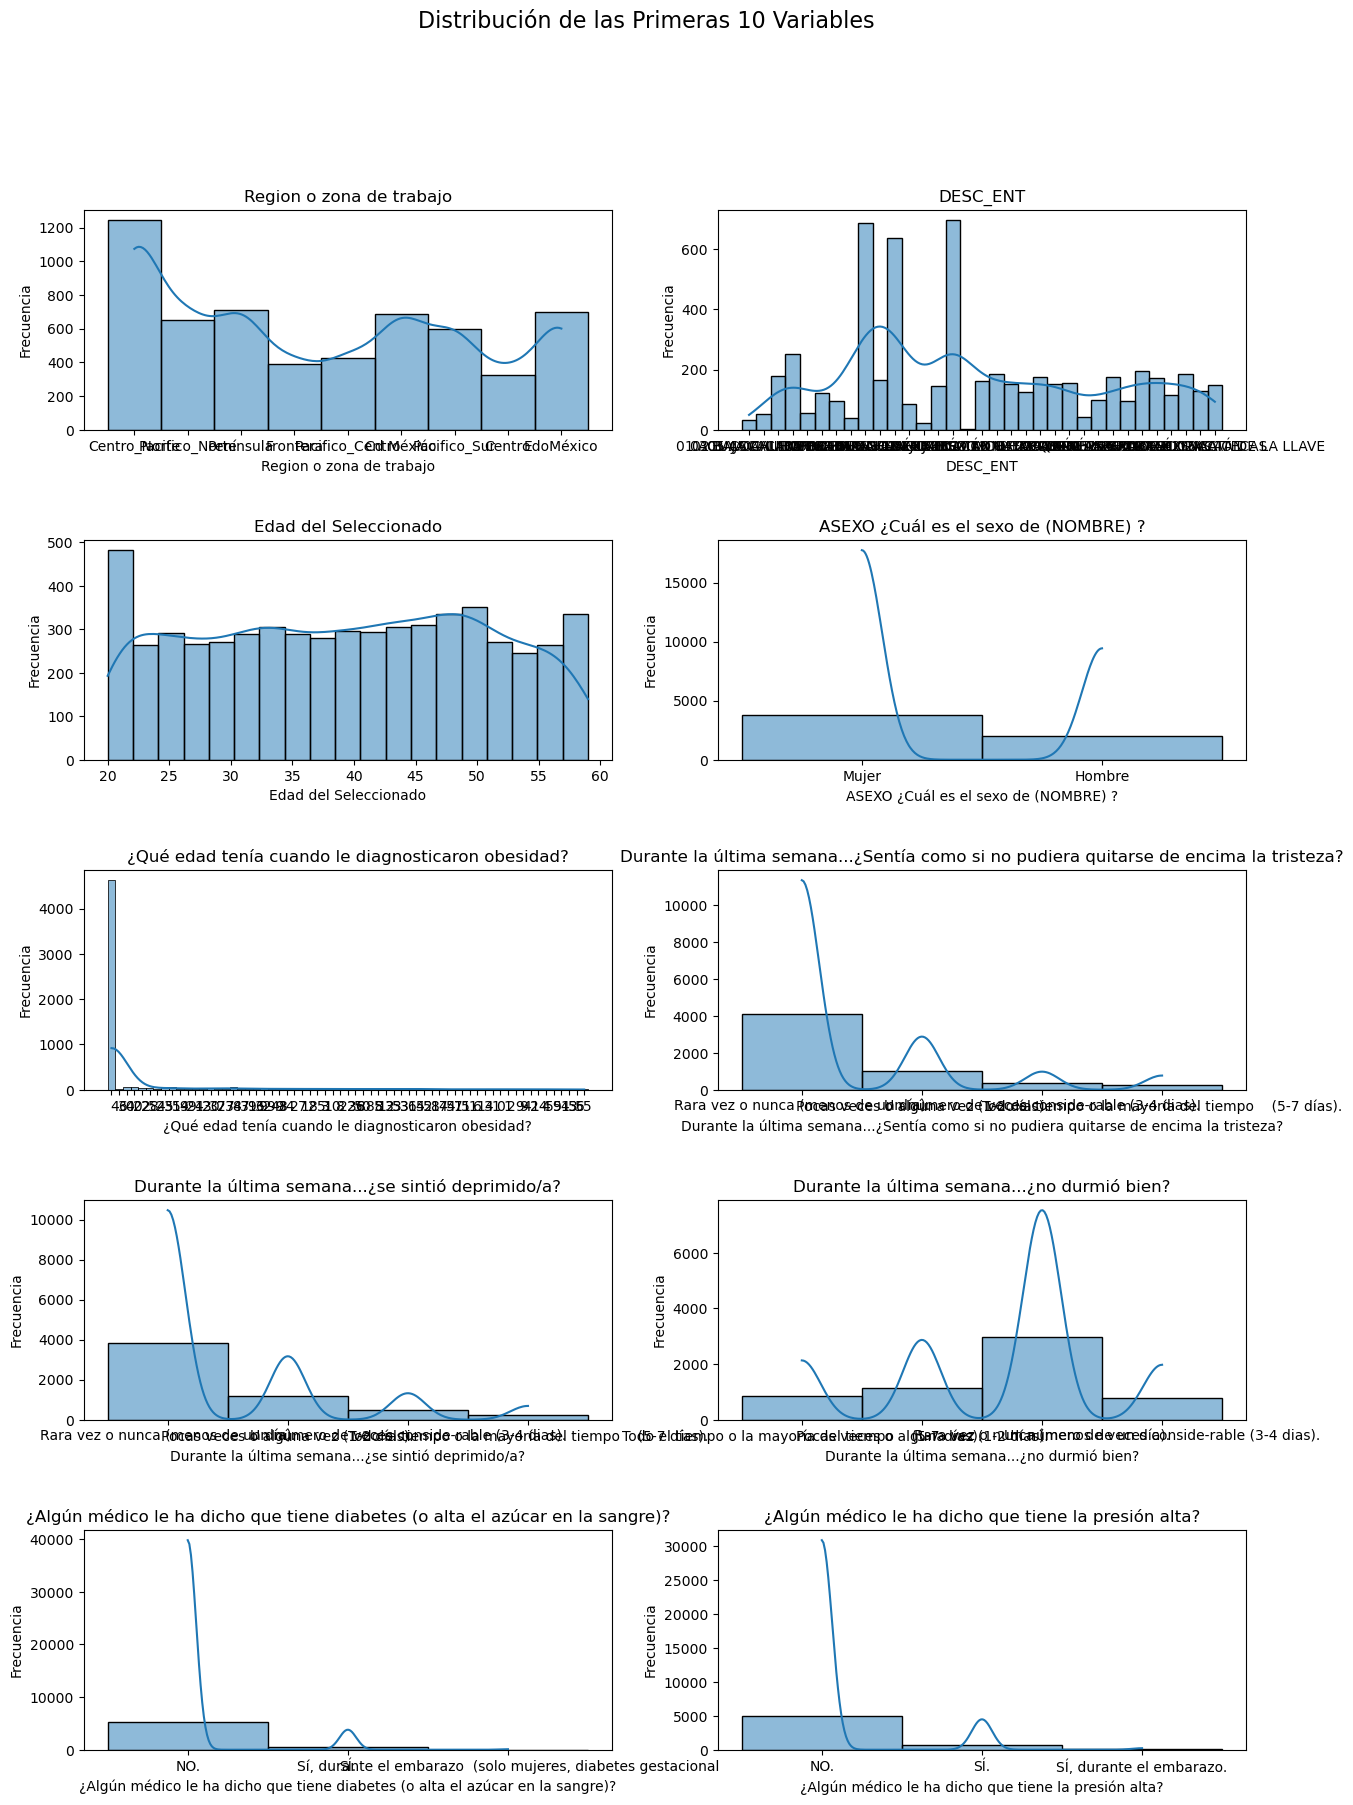

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis de la distribución de las variables
# Seleccionando un subconjunto de columnas para el análisis de distribución
columns_for_distribution = clustered_data.columns[2:12]  # Primeras 10 columnas para simplificar
distribution_data = clustered_data[columns_for_distribution]

# Creando gráficos de distribución para las primeras 10 columnas
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
axes = axes.ravel()

for i, col in enumerate(columns_for_distribution):
    sns.histplot(distribution_data[col], ax=axes[i], kde=True)
    axes[i].set_title(col)
    axes[i].set_ylabel('Frecuencia')

plt.suptitle('Distribución de las Primeras 10 Variables', fontsize=16)
plt.show()




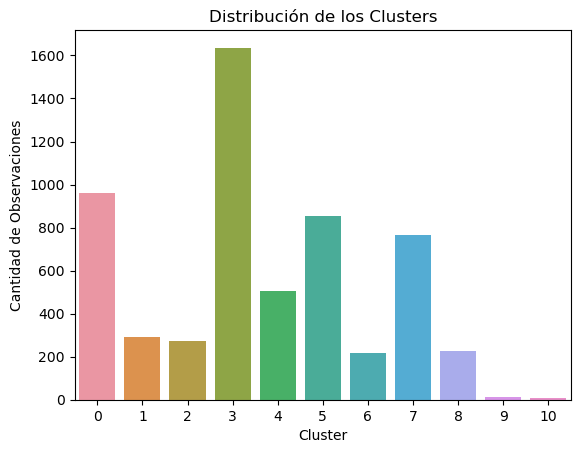

In [3]:
# Análisis de patrones en los clusters
# Visualización de los clusters
sns.countplot(x='Cluster', data=clustered_data)
plt.title('Distribución de los Clusters')
plt.xlabel('Cluster')
plt.ylabel('Cantidad de Observaciones')
plt.show()


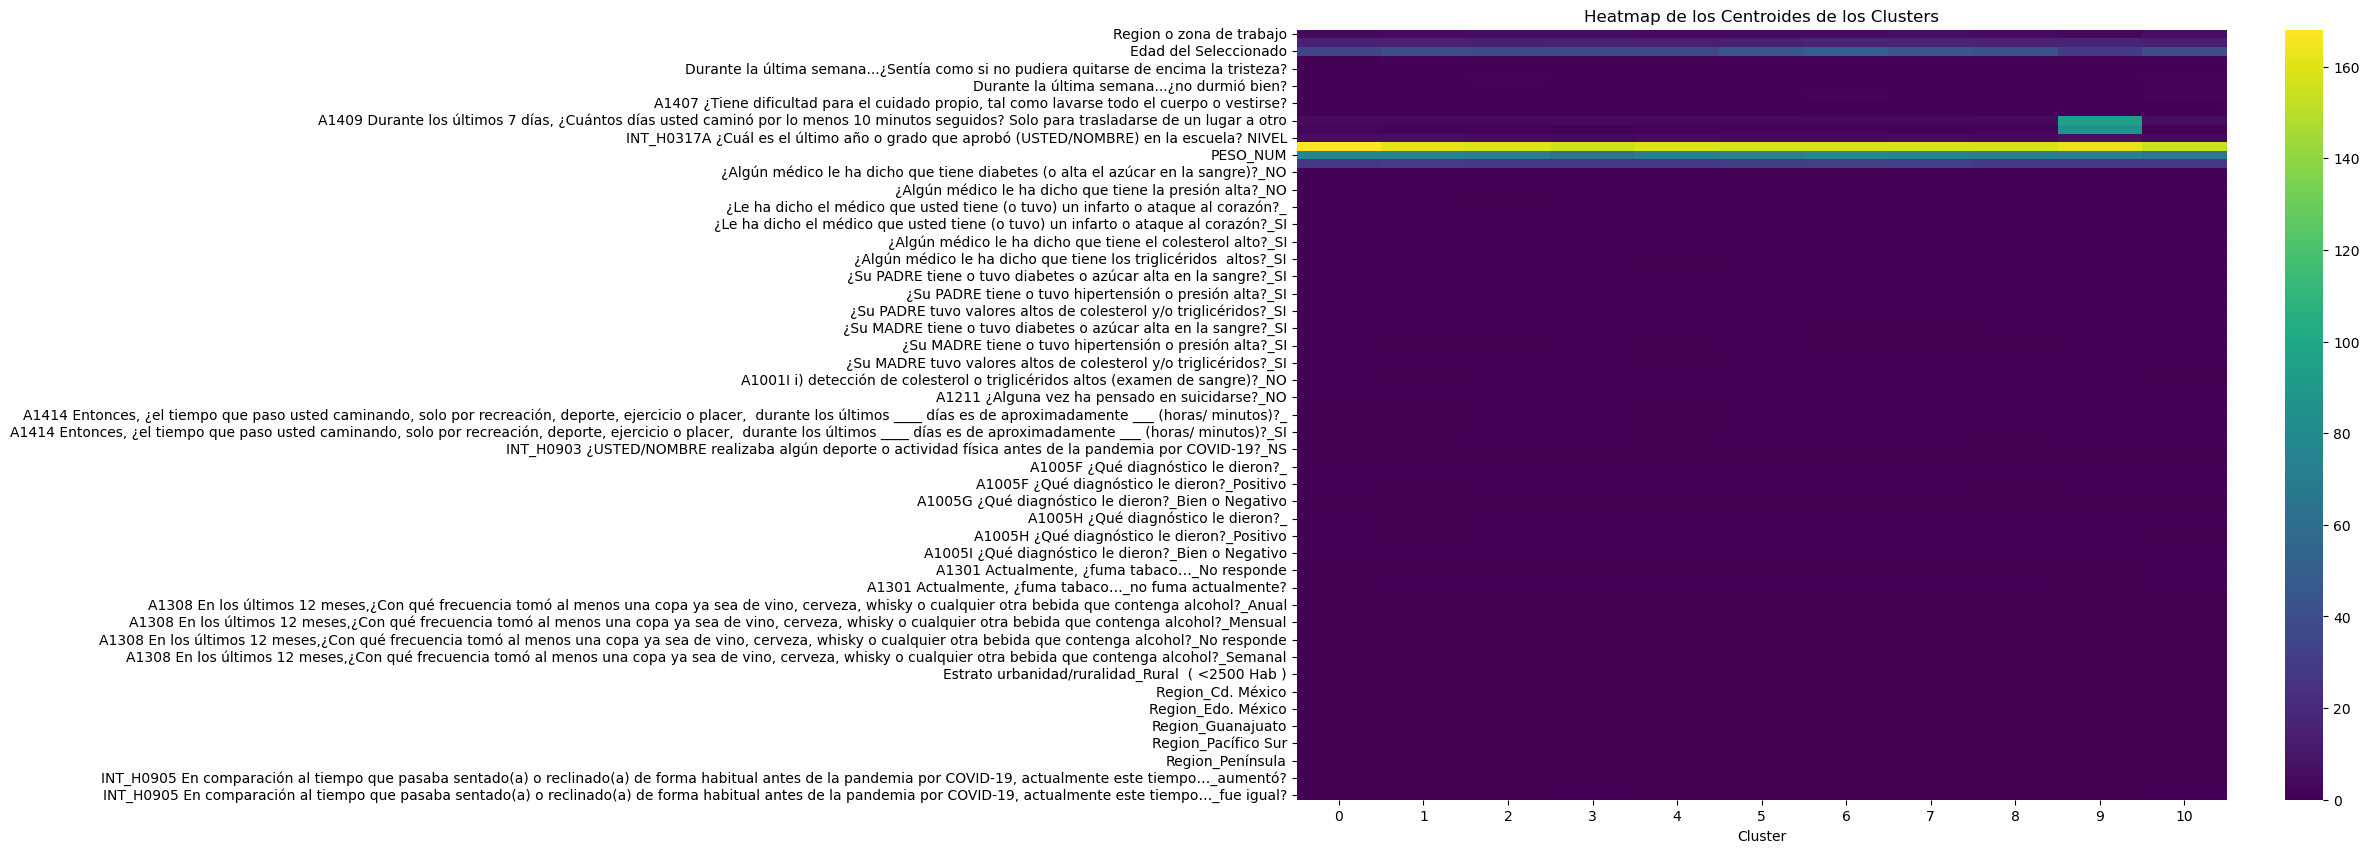

In [4]:

# Interpretación de los centroides de los clusters
# Visualizando los centroides
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(centroid_data.set_index('Cluster').T, cmap='viridis', ax=ax)
ax.set_title('Heatmap de los Centroides de los Clusters')
plt.show()

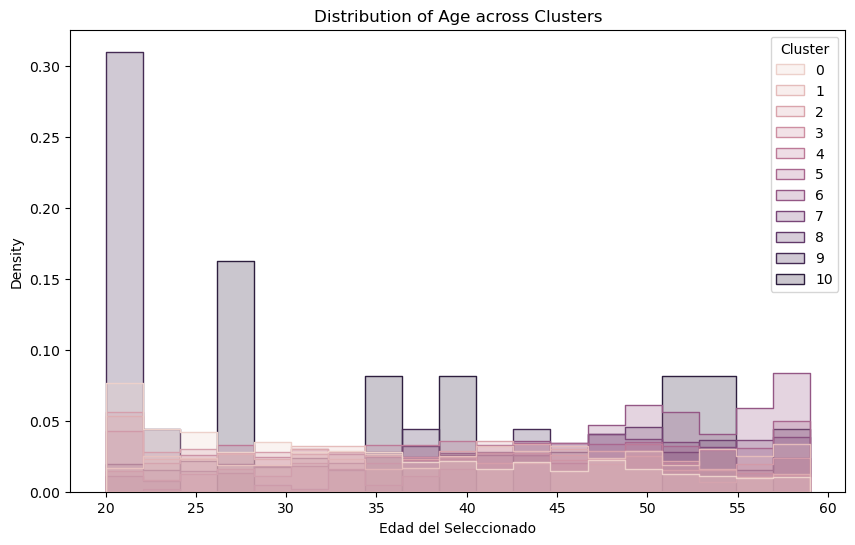

ValueError: `element` must be 'bars' when `discrete` is True

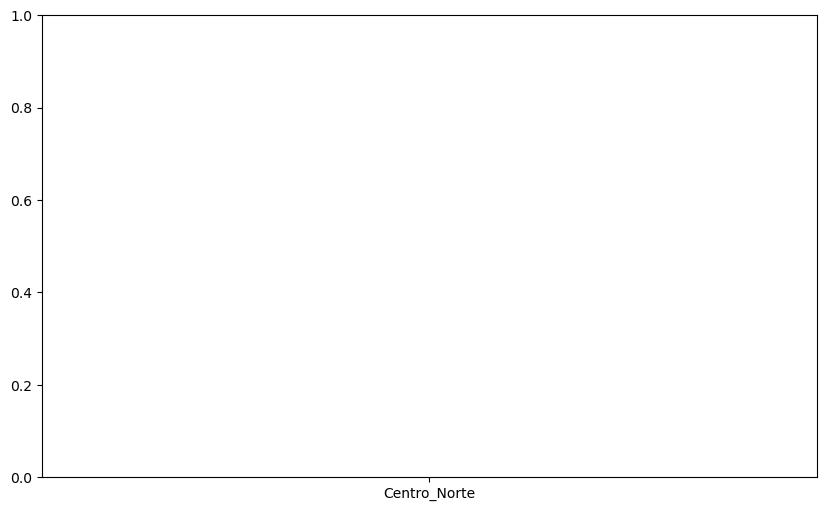

In [4]:
# General analysis focusing on distribution of variables, identification of patterns in clusters, and interpretation of centroids.

# Selecting a subset of columns for a clearer analysis. We will focus on a few key columns.
selected_columns = ['Region o zona de trabajo', 'DESC_ENT', 'Edad del Seleccionado', 'ASEXO ¿Cuál es el sexo de (NOMBRE) ?', 'Cluster']
subset_clustered_data = clustered_data[selected_columns]
subset_centroid_data = centroid_data[selected_columns]

# Plotting distributions of a few selected variables for each cluster
def plot_variable_distribution(data, variable, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=variable, hue="Cluster", element="step", stat="density", common_norm=False)
    plt.title(title)
    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.show()

# Plotting for 'Edad del Seleccionado'
plot_variable_distribution(subset_clustered_data, 'Edad del Seleccionado', 'Distribution of Age across Clusters')

# Plotting for 'Region o zona de trabajo'
plot_variable_distribution(subset_clustered_data, 'Region o zona de trabajo', 'Distribution of Work Region across Clusters')

# Analyzing centroids
# For a more detailed analysis, we can examine the mean values of each variable in the centroids
centroid_means = subset_centroid_data.groupby('Cluster').mean()
centroid_means.T  # Transposing for a better view

